## Project 1 - Group 7

## Data Description

Date : Date of observation

btc_market_price : Average USD market price across major bitcoin exchanges.

btc_total_bitcoins : The total number of bitcoins that have already been mined.

btc_market_cap : The total USD value of bitcoin supply in circulation.

btc_trade_volume : The total USD value of trading volume on major bitcoin exchanges.

btc_blocks_size : The total size of all block headers and transactions.

btc_avg_block_size : The average block size in MB.

btc_n_orphaned_blocks : The total number of blocks mined but ultimately not attached to the main Bitcoin blockchain.

btc_n_transactions_per_block : The average number of transactions per block.

btc_median_confirmation_time : The median time for a transaction to be accepted into a mined block.

btc_hash_rate : The estimated number of tera hashes per second the Bitcoin network is performing.

btc_difficulty : A relative measure of how difficult it is to find a new block.

btc_miners_revenue : Total value of coinbase block rewards and transaction fees paid to miners.

btc_transaction_fees : The total value of all transaction fees paid to miners.

btc_cost_per_transaction_percent : miners revenue as percentage of the transaction volume.

btc_cost_per_transaction : miners revenue divided by the number of transactions.

btc_n_unique_addresses : The total number of unique addresses used on the Bitcoin blockchain.

btc_n_transactions : The number of daily confirmed Bitcoin transactions.

btc_n_transactions_total : Total number of transactions.

btc_n_transactions_excluding_popular : The total number of Bitcoin transactions, excluding the 100 most popular addresses.

btc_n_transactions_excluding_chains_longer_than_100 : The total number of Bitcoin transactions per day excluding long transaction chains.

btc_output_volume : The total value of all transaction outputs per day.

btc_estimated_transaction_volume : The total estimated value of transactions on the Bitcoin blockchain.

### 1. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

### 2. Importing the "bitcoin_dataset" dataset into a DataFrame

In [2]:
data = pd.read_csv('bitcoin_dataset.csv',parse_dates=['Date'])
test = pd.read_csv('test_set.csv',parse_dates=['Date'])

In [3]:
np.set_printoptions(precision=3)
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [27]:
test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


### 3. Removing "btc_" prefix from every column label

In [4]:
data = data.rename(columns={col: col.replace('btc_', '') for col in data.columns})
test = test.rename(columns={col: col.replace('btc_', '') for col in test.columns})
data.head()

,Date,market_price,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [6]:
data.shape

(2906, 24)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                               2906 non-null datetime64[ns]
market_price                                       2906 non-null float64
total_bitcoins                                     2879 non-null float64
market_cap                                         2906 non-null float64
trade_volume                                       2885 non-null float64
blocks_size                                        2877 non-null float64
avg_block_size                                     2906 non-null float64
n_orphaned_blocks                                  2906 non-null int64
n_transactions_per_block                           2906 non-null float64
median_confirmation_time                           2894 non-null float64
hash_rate                                          2906 non-null float64
difficulty                                         2890 non-null float64
miners_reven

We can observe that there are no categorical variables in the data. All features contain ratio or interval data.

### Descriptive Statistics

In [159]:
data.describe()

,market_price,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,hash_rate,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


### 4. Plotting the trend of market_price

Text(0.5,0,'Year')

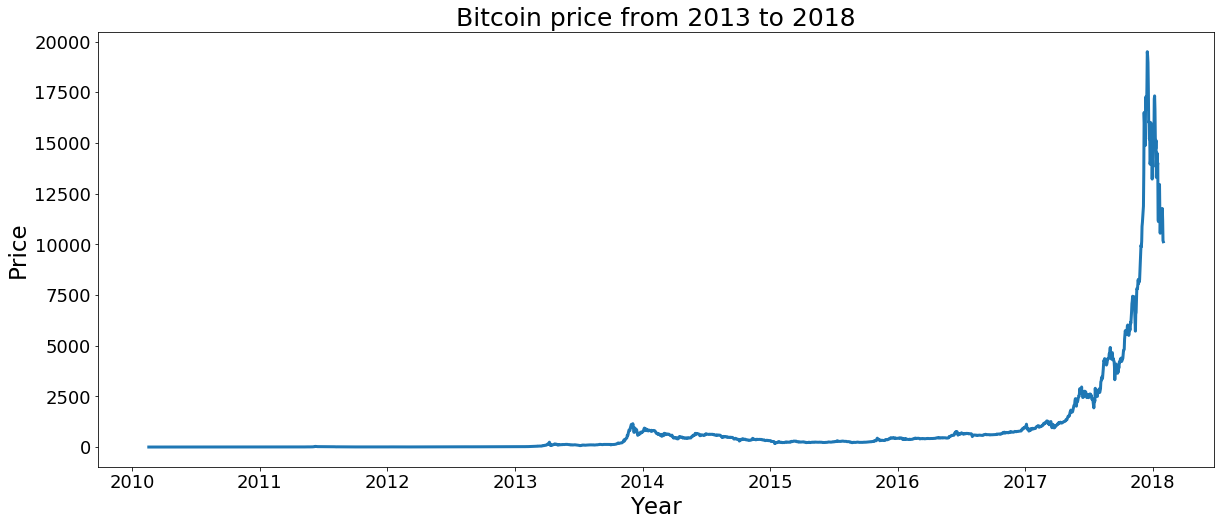

In [160]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.plot(data['Date'], data['market_price'], lw=3)
ax.tick_params(labelsize=18)
ax.set_title('Bitcoin price from 2013 to 2018', fontsize=25)
ax.set_ylabel('Price',fontsize=23)
ax.set_xlabel('Year',fontsize=23)

### Correlation Plot for all features

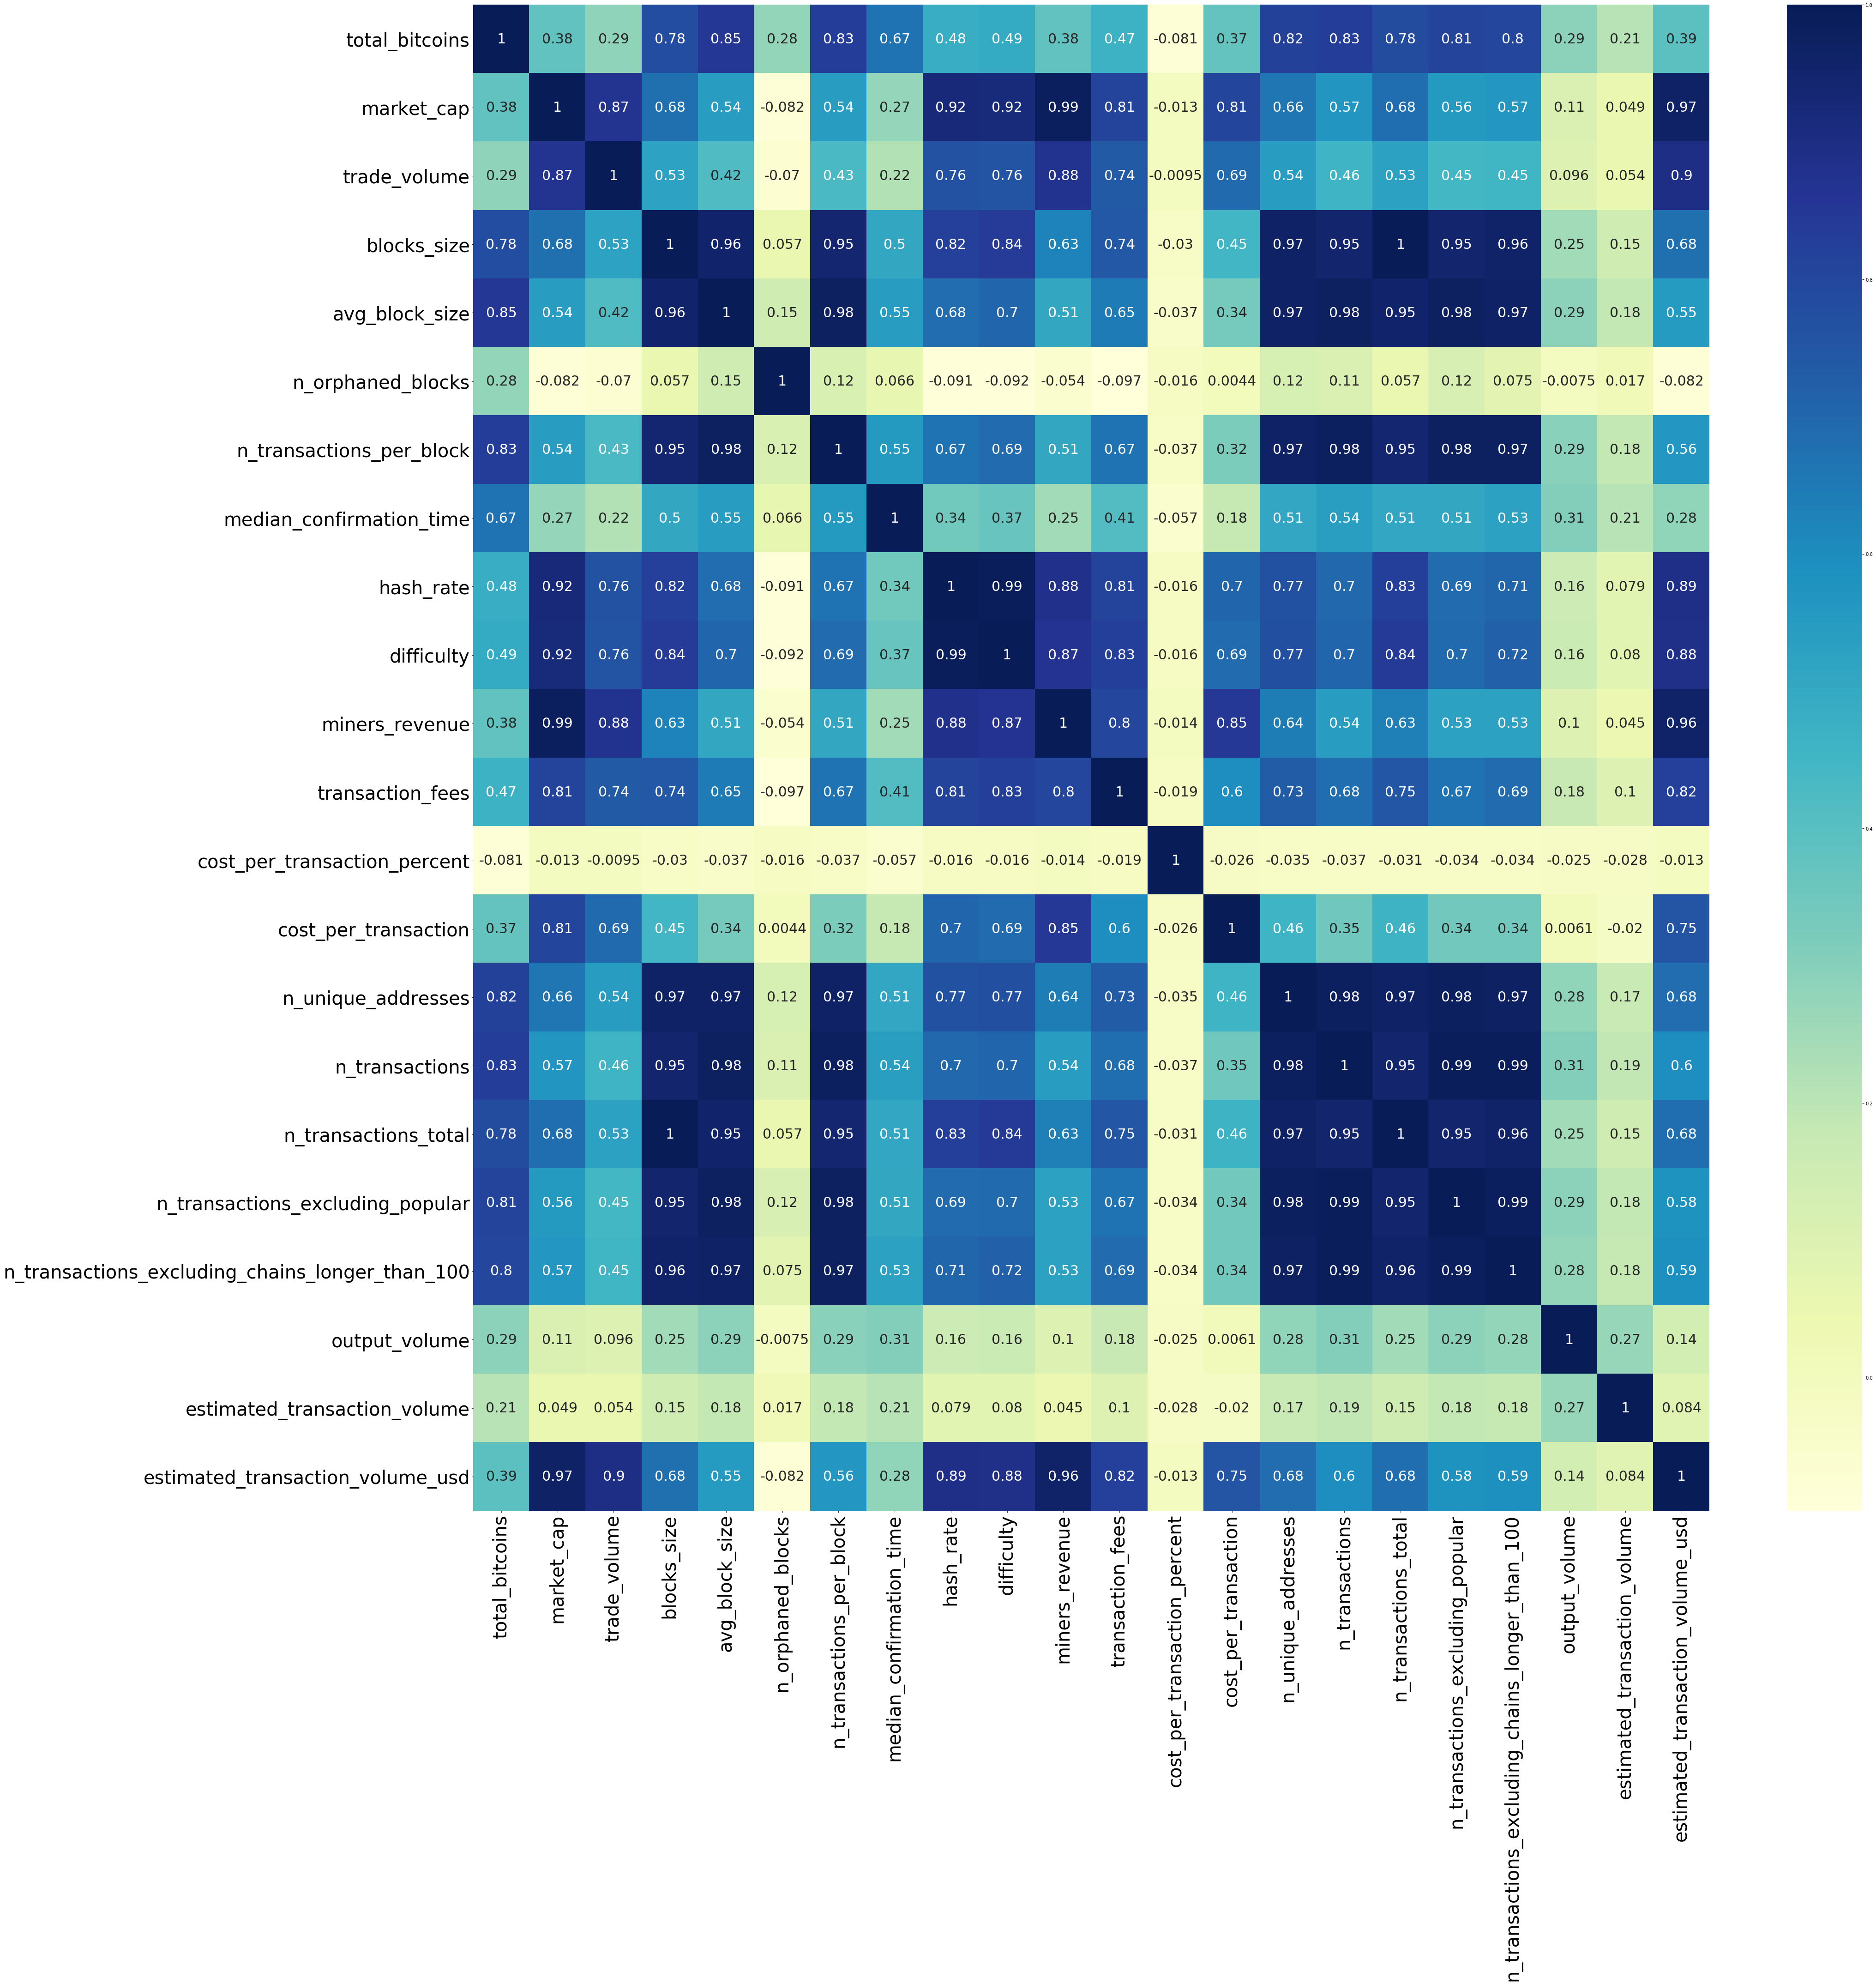

In [65]:
corr = data.drop(['market_price'],axis=1,inplace=False, errors='ignore').corr()
fig, ax = plt.subplots(figsize=(60, 60))
ax.tick_params(labelsize=40)
sns.heatmap(corr, annot=True,annot_kws={"size": 30},cmap='YlGnBu')
plt.show()

#### 1. As we can see from above correlation matrix, many of the features are correlated(Multi-collinearity) and redundant. So we need to drop some of these features to reduce the noise.
#### 2. Ridge and Lasso regressions can handle multicollinearity by penalizing the coefficients, but linear regression models can't handle this.

### 5. Variables which have higher correlations with market_price

In [82]:
numerics = ['int64', 'float64']
num_df = data.select_dtypes(include=numerics)
# Pearson correlation
corr = data.corr()['market_price']
# convert series to dataframe so it can be sorted
corr = pd.DataFrame(corr)
# label the correlation column
corr.columns = ["Correlation"]
# sort correlation
corr2 = corr.sort_values(by=['Correlation'], ascending=False)
corr2.head(25)

,Correlation
market_price,1.000000
market_cap,0.999784
miners_revenue,0.986732
estimated_transaction_volume_usd,0.968308
hash_rate,0.920876
difficulty,0.916925
trade_volume,0.868813
cost_per_transaction,0.815507
transaction_fees,0.806595
n_transactions_total,0.680048


### 6. Dropping "Date" column

In [7]:
data.drop(['Date'],axis=1,inplace=True, errors='ignore')
test.drop(['Date'],axis=1,inplace=True, errors='ignore')
test.shape

(14, 22)

### Are there any missing values in the dataset?

In [46]:
pd.isnull(data).values.any()

True

In [29]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

### How many values are missing?

In [8]:
data.isnull().sum().sum()

115

### 7. Dropping observations with NaN values, as number of such observations(rows) is 3.95% < 5% of the dataset

In [9]:
data.dropna(inplace = True)
pd.isnull(data).values.any()

False

In [10]:
data.shape

(2791, 23)

### 8. Splitting data into x and y sets

In [11]:
x = data.drop('market_price', axis=1)
y = data[['market_price']]
x_test = test

In [13]:
x.head()

,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,hash_rate,difficulty,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [14]:
y.head()

,market_price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### 9. Splitting Data into train & validation sets with 0.8 to 0.2 ratio

In [15]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
x_train.shape

(2232, 22)

In [17]:
x_cv.shape

(559, 22)

In [18]:
y_cv.shape

(559, 1)

### 10. As various features are having different scales, performing feature standardization:

In [161]:
"""from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
# Applying the scaling to the validation & test sets that we computed for the training set
x_cv_scaled = pd.DataFrame(scaler.transform(x_cv))
x_test_scaled = pd.DataFrame(scaler.transform(x_lm_test))"""

In [19]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train))
x_cv_scaled = pd.DataFrame(scaler.transform(x_cv))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

In [20]:
x_train_scaled.columns = x.columns
x_cv_scaled.columns = x.columns
x_test_scaled.columns = x.columns

In [21]:
x_train_scaled.describe()

,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,hash_rate,difficulty,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
count,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,...,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03
mean,1.956818e-16,2.347783e-17,5.491426e-17,-7.759623e-18,4.655774e-17,-1.875242e-17,2.646231e-17,2.413442e-16,5.093496e-17,-9.948235e-19,...,-6.774126e-18,4.277741e-17,2.686023e-17,-2.228405e-17,-5.829666e-17,-2.546748e-17,2.606438e-17,-2.009543e-17,5.918889e-17,6.844386e-17
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.279092e+00,-3.513551e-01,-2.589748e-01,-8.171688e-01,-1.005612e+00,-4.398214e-01,-9.854577e-01,-1.538472e+00,-4.254917e-01,-4.353315e-01,...,-3.886843e-02,-7.313904e-01,-9.424068e-01,-9.951481e-01,-8.360628e-01,-9.181717e-01,-9.141718e-01,-7.134049e-01,-7.443816e-01,-3.506259e-01
25%,-7.074246e-01,-3.498578e-01,-2.578663e-01,-7.975602e-01,-9.311681e-01,-4.398214e-01,-9.052830e-01,-2.800409e-01,-4.254876e-01,-4.353271e-01,...,-3.835092e-02,-5.211770e-01,-8.559441e-01,-9.147269e-01,-8.042726e-01,-8.516163e-01,-8.121367e-01,-4.905142e-01,-3.933135e-01,-3.487370e-01
50%,2.229041e-01,-2.617045e-01,-2.215096e-01,-4.567327e-01,-4.231153e-01,-4.398214e-01,-4.271499e-01,6.760601e-02,-4.149597e-01,-4.249260e-01,...,-3.773836e-02,-3.404829e-01,-2.848183e-01,-3.787242e-01,-4.206679e-01,-3.750835e-01,-3.924435e-01,-2.154837e-01,-9.518919e-02,-2.800316e-01
75%,8.733619e-01,-1.383860e-01,-1.587290e-01,5.220901e-01,9.323526e-01,-4.398214e-01,8.071698e-01,5.255235e-01,-6.095058e-02,-4.232384e-02,...,-3.607063e-02,2.158398e-02,7.868772e-01,8.360022e-01,4.881632e-01,8.720354e-01,7.267577e-01,2.112729e-01,1.859832e-01,-1.187110e-01
max,1.270550e+00,8.293678e+00,1.581351e+01,2.765724e+00,2.158258e+00,7.731129e+00,2.981917e+00,8.104732e+00,7.129146e+00,6.663328e+00,...,4.412352e+01,7.320401e+00,4.241063e+00,3.760287e+00,2.781839e+00,3.635292e+00,3.685007e+00,1.672248e+01,2.006396e+01,9.555698e+00


In [22]:
y_train.shape

(2232, 1)

# 11. Linear Regression using sklearn

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Train the model using the training sets
linreg = lm.fit(x_train_scaled,y_train)


print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {}'
     .format(linreg.score(x_train_scaled, y_train)))

linear model coeff (w): [[ -1.798e+01   2.171e+03  -1.258e-01  -9.196e+02   1.069e+01  -7.369e-01
   -8.109e+00   2.467e+00  -6.111e+01   2.703e+01   3.472e+01  -1.917e+01
    6.471e-02   5.379e+01   2.300e+01   4.381e+00   9.436e+02  -2.069e+00
    8.331e+00   5.935e-01   1.501e-01   1.359e+01]]
linear model intercept (b): [ 830.256]
R-squared score (training): 0.999956494822716


In [24]:
linreg_coef = pd.DataFrame(list(zip(x_train_scaled.columns,np.transpose(linreg.coef_))),columns = ['Features', 'Coefficients'])
linreg_coef

,Features,Coefficients
0,total_bitcoins,[-17.9849919201]
1,market_cap,[2171.17311509]
2,trade_volume,[-0.125818517533]
3,blocks_size,[-919.579676075]
4,avg_block_size,[10.6935793042]
5,n_orphaned_blocks,[-0.736882008961]
6,n_transactions_per_block,[-8.10860314956]
7,median_confirmation_time,[2.46665462057]
8,hash_rate,[-61.110078412]
9,difficulty,[27.034146098]


### Predicting using the Linear Regression model on the validation dataset

In [25]:
y_cv_predict = linreg.predict(x_cv_scaled)
linreg_predict = pd.DataFrame(list(zip(y_cv['market_price'],y_cv_predict)),columns=['Actual','Predicted'])
linreg_predict

,Actual,Predicted
0,1050.110000,[1070.1699103]
1,5.000730,[10.1245986325]
2,5711.205867,[5674.468529]
3,13.548000,[12.1747514066]
4,3.230000,[3.16044159148]
5,0.103000,[-4.91312124983]
6,2495.028586,[2499.78284791]
7,359.800000,[359.608317296]
8,0.440000,[-2.07091600981]
9,560.490000,[594.579268487]


### Overlay of actual prices and predicted prices scatterplots

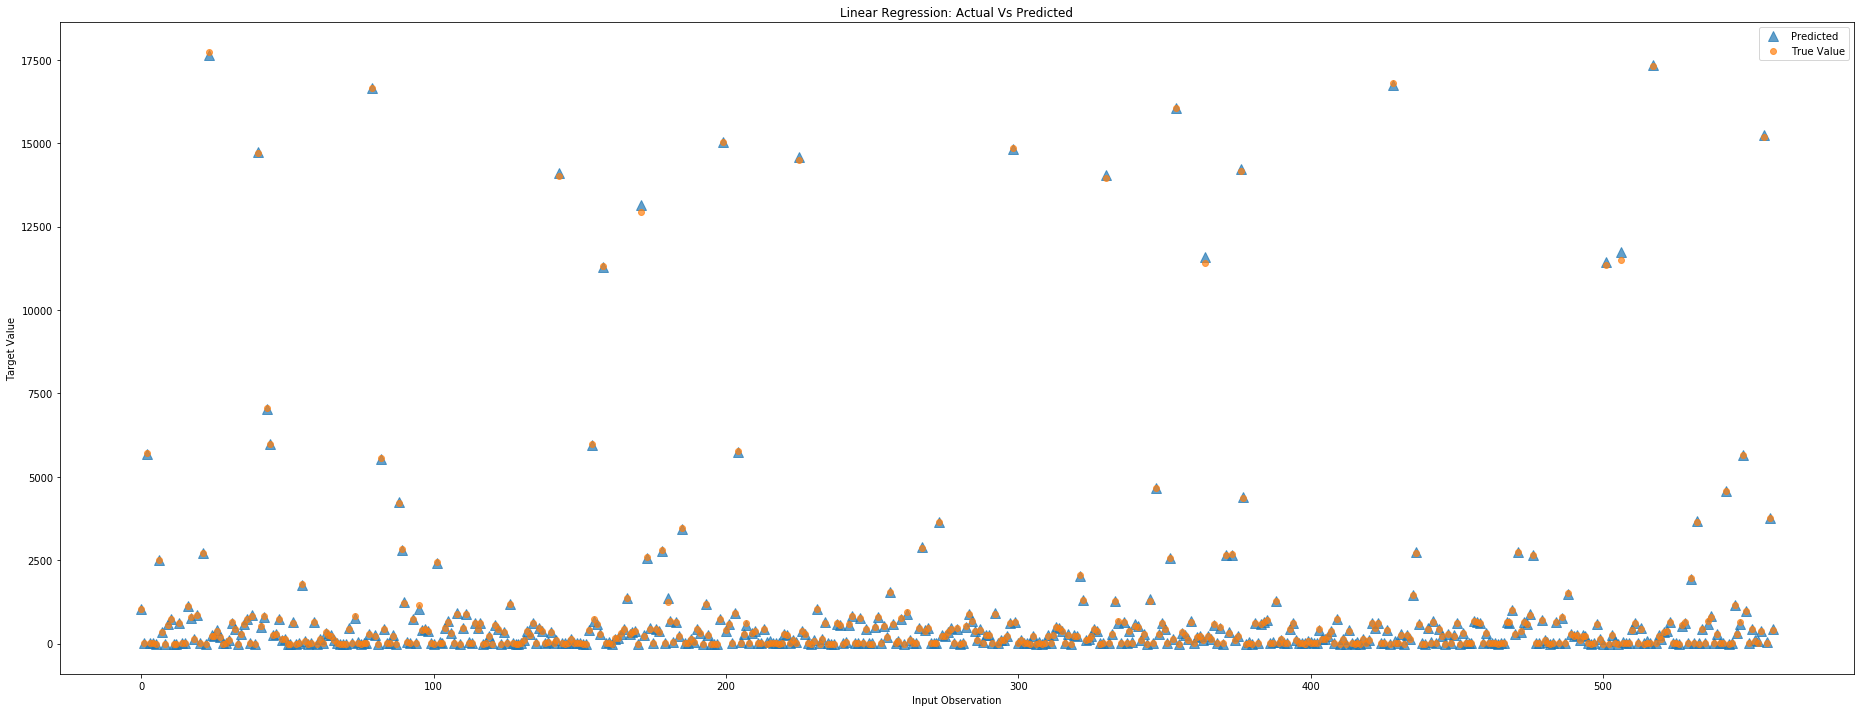

In [100]:
fig = plt.figure(figsize=(26,10))
thisaxis = fig.add_subplot(111)

X = linreg_predict.index

thisaxis.plot(X, linreg_predict['Predicted'], '^', markersize = 10,label='Predicted', alpha=0.7)
thisaxis.plot(X, linreg_predict['Actual'], 'o', label='True Value', alpha=0.7)
thisaxis.set_xlabel('Input Observation')
thisaxis.set_ylabel('Target Value')
thisaxis.set_title('Linear Regression: Actual Vs Predicted')
thisaxis.legend()
plt.tight_layout()

## Predicting the market_price on given "test" dataset using the above linear regression model

In [101]:
pd.DataFrame(linreg.predict(x_test_scaled),columns=['Prediction'])

,Prediction
0,9174.865220
1,9036.435318
2,9238.897541
3,8626.175256
4,6986.540846
5,7793.719314
6,8198.344634
7,8373.521584
8,8672.465586
9,8463.633614


### Plotting the bar chart of all the coefficients values from the linear regression model

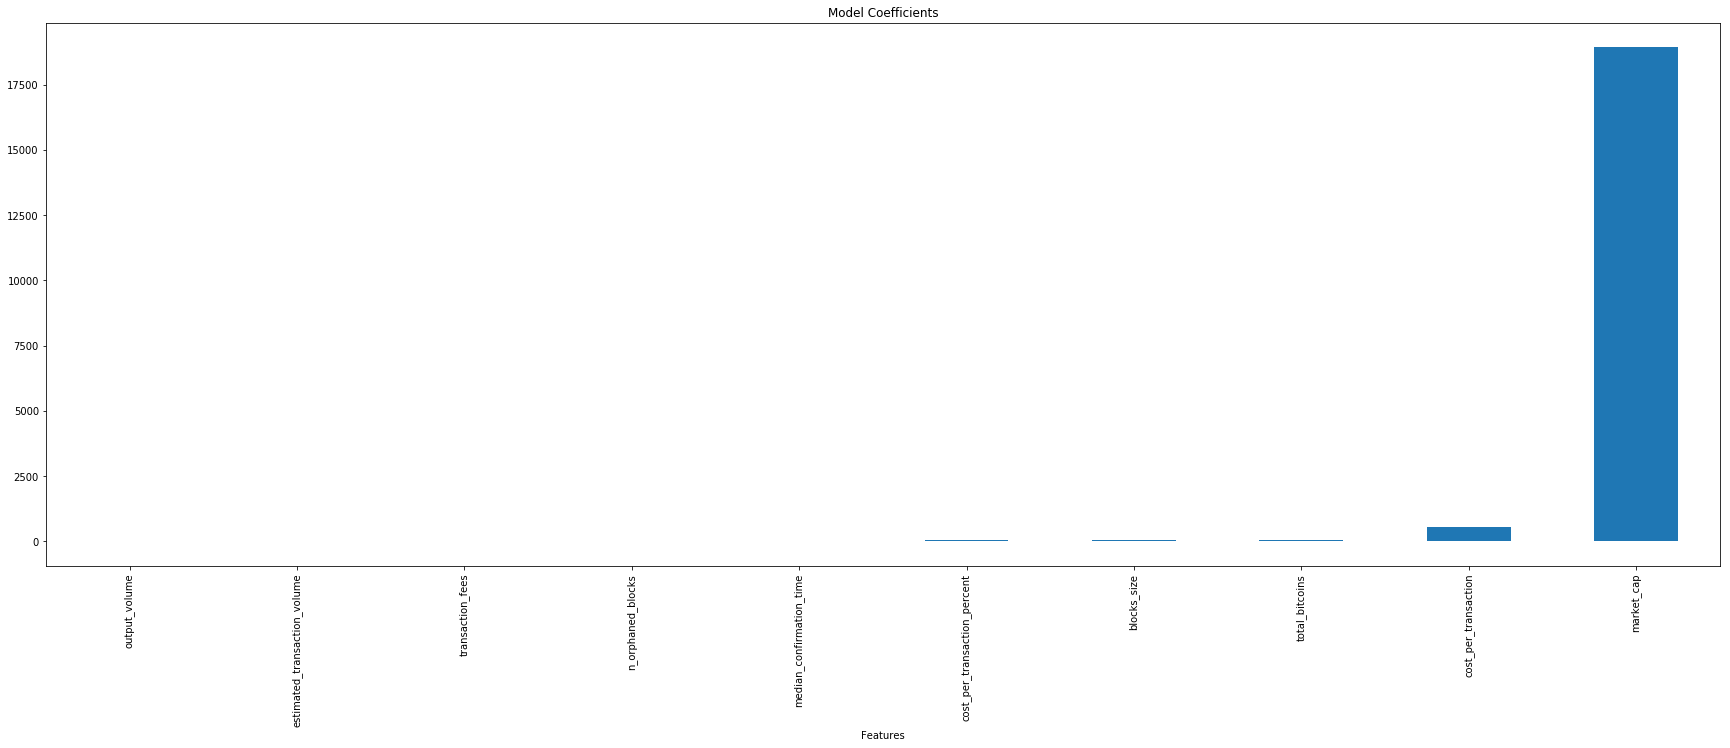

In [102]:
from pandas import Series

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

predictors = linreg_coef['Features']
coefficients = linreg.coef_[0]

coef = Series(coefficients,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

### Cross-Validation for above Linear Regression model:

In [27]:
from sklearn.model_selection import cross_val_score

# CV with default number of folds = 3
linreg_cv_scores = cross_val_score(linreg, x_cv, y_cv)
print("Cross validation scores: {}".format(linreg_cv_scores))

Cross validation scores: [ 1.  1.  1.]


In [28]:
# CV with 5 number of folds
linreg_cv_scores = cross_val_score(linreg, x_cv, y_cv, cv = 5)
print("Cross validation scores: {}".format(linreg_cv_scores))

Cross validation scores: [ 1.  1.  1.  1.  1.]


In [29]:
print("Average cross-validation scroe: {}".format(linreg_cv_scores.mean()))

Average cross-validation scroe: 0.9999637564564716


# 12. Linear Regression using statsmodels

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\HPHP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [44]:
# Transforming DataFrames into numpy arrays
np_x_train_scaled = x_train_scaled.as_matrix()
np_y_train = y_train.as_matrix()

array([[  3.278e-01,   2.951e-04,   8.112e-05, ...,   1.649e-02,
          7.110e-03,   1.005e-04],
       [  7.118e-01,   1.937e-02,   1.013e-02, ...,   2.082e-02,
          2.929e-02,   1.490e-02],
       [  2.934e-01,   1.760e-04,   3.389e-05, ...,   6.671e-03,
          8.338e-03,   7.590e-05],
       ..., 
       [  7.732e-01,   1.471e-02,   4.503e-03, ...,   1.356e-02,
          1.727e-02,   6.223e-03],
       [  9.744e-01,   1.461e-01,   6.189e-02, ...,   6.342e-02,
          4.474e-02,   1.311e-01],
       [  9.921e-01,   5.932e-01,   2.822e-01, ...,   6.784e-02,
          3.855e-02,   4.516e-01]])

In [34]:
linreg2 = sm.OLS(np_y_train, np_x_train_scaled).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.622e+06
Date:                Sun, 04 Mar 2018   Prob (F-statistic):               0.00
Time:                        13:13:26   Log-Likelihood:                -9190.2
No. Observations:                2232   AIC:                         1.842e+04
Df Residuals:                    2210   BIC:                         1.855e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -66.6579      2.525    -26.401      0.0

Mapping x variables in the above model to actual column names

In [39]:
pd.DataFrame(list(zip(x_train_scaled.columns,['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22'])))

,0,1
0,total_bitcoins,x1
1,market_cap,x2
2,trade_volume,x3
3,blocks_size,x4
4,avg_block_size,x5
5,n_orphaned_blocks,x6
6,n_transactions_per_block,x7
7,median_confirmation_time,x8
8,hash_rate,x9
9,difficulty,x10


From the above regression summary, based on p-values we can say that trade_volume(x3), n_orphaned_blocks(x6), cost_per_transaction_percent(x13), n_transactions(x16), n_transactions_excluding_popular(x18), output_volume(x20), estimated_transaction_volume(x21) variables are not significant at 95% confidence levels.

# 13. KNN - Regressor

#### Splitting dataset into test & validation with 0.8 to 0.2 ratio and performing feature scaling:

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
# Applying the scaling to the validation & test sets that we computed for the training set
x_cv_scaled = pd.DataFrame(scaler.transform(x_cv))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

x_train_scaled.columns = x.columns
x_cv_scaled.columns = x.columns
x_test_scaled.columns = x.columns

x_train_scaled.describe()

,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,hash_rate,difficulty,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03,2.232000e+03,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,0.642063,0.040642,0.016113,0.228075,0.317842,0.053827,0.248390,0.159540,5.632192e-02,6.132588e-02,...,0.000880,0.090836,0.181810,0.209265,0.231091,0.201642,0.198768,0.040916,0.035773,0.035394
std,0.281782,0.115699,0.062232,0.279167,0.316139,0.122412,0.252112,0.103723,1.323987e-01,1.409032e-01,...,0.022649,0.124224,0.192964,0.210333,0.276465,0.219662,0.217479,0.057366,0.048068,0.100968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.442768,0.000173,0.000069,0.005473,0.023529,0.000000,0.020209,0.130499,5.434486e-07,6.248563e-07,...,0.000012,0.026108,0.016680,0.016911,0.008787,0.014616,0.022186,0.012783,0.016872,0.000191
50%,0.704859,0.010370,0.002331,0.100599,0.184109,0.000000,0.140725,0.166550,1.394112e-03,1.465850e-03,...,0.000026,0.048549,0.126863,0.129625,0.114817,0.119269,0.113439,0.028557,0.031199,0.007126
75%,0.888105,0.024635,0.006237,0.373793,0.612530,0.000000,0.451842,0.214036,4.825396e-02,5.536365e-02,...,0.000063,0.093516,0.333615,0.385065,0.366020,0.393153,0.356787,0.053033,0.044711,0.023411
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking plots of actual & predicted values by KNN model using different K values

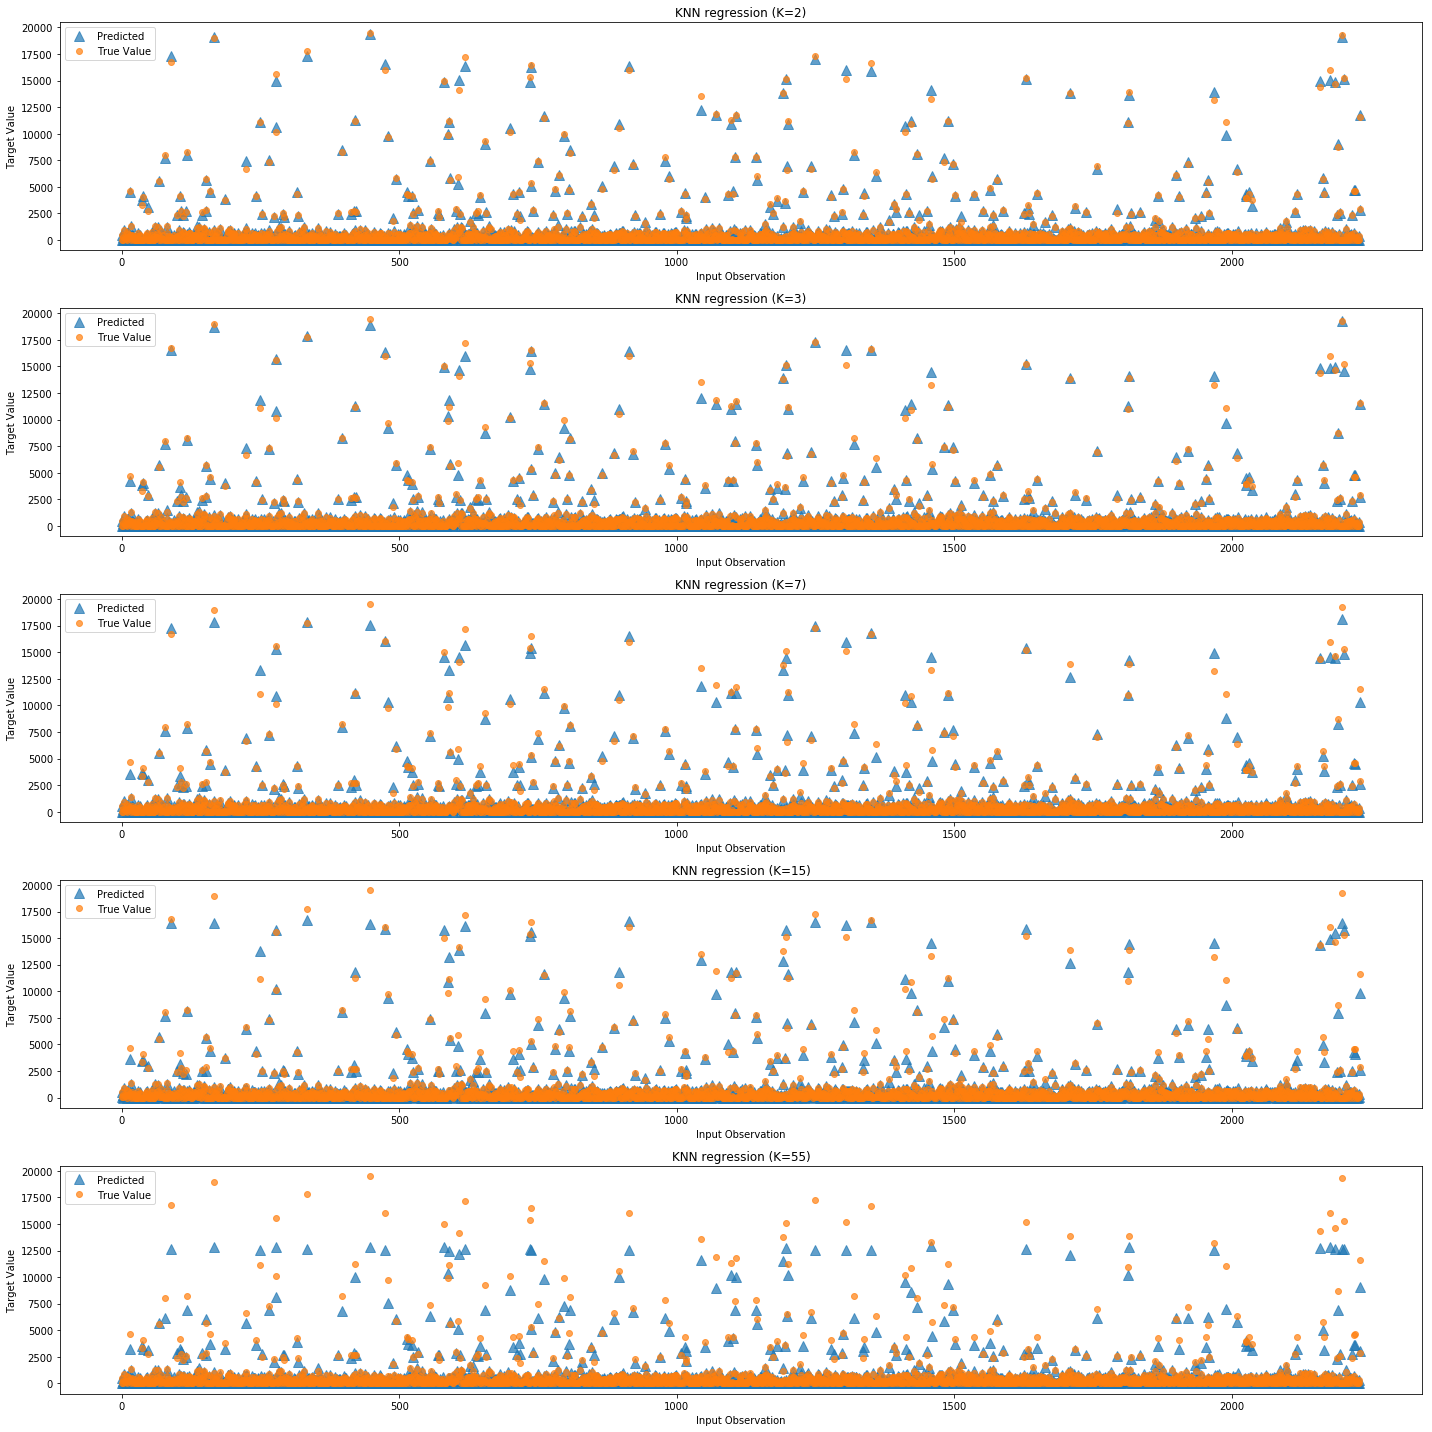

In [37]:
from sklearn.neighbors import KNeighborsRegressor

# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(20,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)


for thisaxis, K in zip(subaxes, [2, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(x_train_scaled, y_train)
    y_predict_output = knnreg.predict(x_train_scaled)
    thisaxis.plot(x_train_scaled.index, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.7)
    thisaxis.plot(x_train_scaled.index, y_train, 'o', label='True Value', alpha=0.7)
    thisaxis.set_xlabel('Input Observation')
    thisaxis.set_ylabel('Target Value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

From the above plots we can see that, as the K-value increases beyond 3, accuracy is degrading.

In [35]:
# Print scores of k-NN regression on train dataset for different values of K

for thisaxis, K in zip(subaxes, [2, 3, 5, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(x_train_scaled, y_train)
    y_predict_output = knnreg.predict(x_train_scaled)
    train_score = knnreg.score(x_train_scaled, y_train)
    validation_score = knnreg.score(x_cv_scaled, y_cv)
    
    print('KNN Regression (K={}) \n Train R^2 = {},  Validation R^2 = {}'.format(K, train_score, validation_score))

KNN Regression (K=2) 
 Train R^2 = 0.9983112635126433,  Validation R^2 = 0.9950040296088113
KNN Regression (K=3) 
 Train R^2 = 0.9975023689290969,  Validation R^2 = 0.9948294635395936
KNN Regression (K=5) 
 Train R^2 = 0.9958436454370253,  Validation R^2 = 0.994619416629044
KNN Regression (K=7) 
 Train R^2 = 0.9941284739108153,  Validation R^2 = 0.9950340678697673
KNN Regression (K=15) 
 Train R^2 = 0.9911249942771301,  Validation R^2 = 0.9946930413749672


Based on the above test and training R-square scores, K=2 is the optimal value for the model.

In [40]:
knnreg = KNeighborsRegressor(n_neighbors=2).fit(x_train_scaled, y_train)

print('R-squared test score: {}'
     .format(knnreg.score(x_cv_scaled, y_cv)))

R-squared test score: 0.9950040296088113


### Cross-Validation for KNN Regressor:

In [41]:
#Cross-validation with default number of folds, 3
knn_cv3_scores = cross_val_score(knnreg, x_cv, y_cv)
print("Cross validation scores: {}".format(knn_cv3_scores))

Cross validation scores: [ 0.952  0.981  0.969]


In [42]:
#Average cross-validation score across 5 folds
print("Average cross-validation scroe: {:.2f}".format(knn_cv3_scores.mean()))

Average cross-validation scroe: 0.97


### Gridsearch using different K values

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid_search_knn.fit(x_train_scaled,(y_train))

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.9927279817136936


### Grid search also concludes that K=2 gives optimal solution for the KNN

## Predicting the market_price on given "test" dataset using the above KNN regression model

In [43]:
pd.DataFrame(knnreg.predict(x_test_scaled),columns=['Prediction'])

,Prediction
0,10576.938335
1,10576.938335
2,10974.885835
3,11645.243335
4,10576.938335
5,10576.938335
6,10154.537500
7,10154.537500
8,10154.537500
9,10698.358335


# 14. Ridge Regression
Alpha by default is 1.0

### Ridge regression with regularization parameter: alpha

In [62]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0.001,1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(x_train_scaled, y_train)
    r2_train = linridge.score(x_train_scaled, y_train)
    r2_validation = linridge.score(x_cv_scaled, y_cv)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {}, r-squared validation: {}'
         .format(this_alpha, num_coeff_bigger, r2_train,r2_validation))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.001
num abs(coeff) > 1.0: 21, r-squared training: 0.999956097428722, r-squared validation: 0.9999613131987325
Alpha = 1
num abs(coeff) > 1.0: 22, r-squared training: 0.9963631605350367, r-squared validation: 0.9959306105432273
Alpha = 10
num abs(coeff) > 1.0: 22, r-squared training: 0.9817987500271157, r-squared validation: 0.9827709108996996
Alpha = 20
num abs(coeff) > 1.0: 22, r-squared training: 0.9679583349581975, r-squared validation: 0.9700698997378352
Alpha = 50
num abs(coeff) > 1.0: 21, r-squared training: 0.9227998272778194, r-squared validation: 0.925215933858781
Alpha = 100
num abs(coeff) > 1.0: 22, r-squared training: 0.8510773663465127, r-squared validation: 0.8512021740587606
Alpha = 1000
num abs(coeff) > 1.0: 21, r-squared training: 0.45542088498900896, r-squared validation: 0.4337065378485071


### Using Grid Search to find out optimal alpha value

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5)

grid_search_ridge.fit(x_train_scaled,(y_train))

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best cross-validation score: {}".format(grid_search_ridge.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.9999518578737713


### Using the best alpha 0.001 given by the Grid Search results & R-Square values

In [76]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=0.001).fit(x_train_scaled, y_train)

print('Bitcoin dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {}'
     .format(linridge.score(x_train_scaled, y_train)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Bitcoin dataset
ridge regression linear model intercept: [-1.413]
ridge regression linear model coeff:
[[ -5.952e+01   1.861e+04  -5.844e+00  -3.030e+03   2.689e+01  -5.482e+00
   -3.710e+01   2.666e+01  -5.181e+02   2.773e+02   4.821e+02  -1.859e+02
    3.382e+00   4.283e+02   1.134e+02   2.737e+01   3.150e+03  -2.738e+01
    5.480e+01   8.269e+00   2.481e-01   1.571e+02]]
R-squared score (training): 0.999956097428722
Number of non-zero features: 22


## Predicting the market_price on given "test" dataset using the above Ridge regression model

In [58]:
pd.DataFrame(linridge.predict(x_test_scaled),columns=['Predicted Prices'])

,Predicted Prices
0,9072.473999
1,8906.539570
2,9083.078935
3,8420.605955
4,6786.968474
5,7602.173261
6,8086.752544
7,8275.986678
8,8567.938229
9,8313.462697


# 15. Lasso Regression

### Lasso regression with regularization parameter: alpha

In [63]:
from sklearn.linear_model import Lasso

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.001,0.01,0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(x_train_scaled, y_train)
    r2_train = linlasso.score(x_train_scaled, y_train)
    r2_validation = linlasso.score(x_cv_scaled, y_cv)
    
    print('Alpha = {}\nFeatures kept: {}, r-squared training: {}, r-squared validation: {}'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train,r2_validation))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.001
Features kept: 22, r-squared training: 0.9999298878308649, r-squared validation: 0.9999401000254136
Alpha = 0.01
Features kept: 22, r-squared training: 0.9999304954155638, r-squared validation: 0.9999408527124392
Alpha = 0.5
Features kept: 7, r-squared training: 0.9999105161917383, r-squared validation: 0.9999222470372953
Alpha = 1
Features kept: 8, r-squared training: 0.99988861767929, r-squared validation: 0.9999114838760299
Alpha = 2
Features kept: 4, r-squared training: 0.9998257153053947, r-squared validation: 0.9998673117447452
Alpha = 3
Features kept: 4, r-squared training: 0.9997430471818194, r-squared validation: 0.9997988386052391
Alpha = 5
Features kept: 4, r-squared training: 0.9994715447413586, r-squared validation: 0.999548683672037
Alpha = 10
Features kept: 4, r-squared training: 0.9981973000532278, r-squared validation: 0.9982850680152748
Alpha = 20
Featur

### Using Grid Search to find out optimal alpha value

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=5)

grid_search_lasso.fit(x_train_scaled,(y_train))

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.9999247904020153


### Using the best alpha 0.01 given by the Grid Search results & R-Square values

In [75]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(x_train_scaled, y_train)

print('Bitcoin dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {}'
     .format(linlasso.score(x_train_scaled, y_train)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(x_train_scaled), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Bitcoin dataset
lasso regression linear model intercept: [-16.346]
lasso regression linear model coeff:
[  2.339e+01   1.881e+04  -3.816e+01  -1.742e+01  -5.841e+01  -2.502e-01
  -8.600e+01   3.580e+01  -4.832e+02   2.571e+02   1.943e+02  -6.997e+01
   6.120e+00   5.150e+02   8.979e+01  -9.504e+01   6.147e+01   5.180e+01
   1.992e+02  -8.985e-01  -2.016e+01   1.942e+02]
Non-zero features: 22
R-squared score (training): 0.9999304954155638
Features with non-zero weight (sorted by absolute magnitude):
	[  7.118e-01   1.937e-02   1.013e-02   1.066e-01   1.967e-01   1.429e-01
   1.319e-01   1.494e-01   2.108e-03   1.923e-03   4.338e-02   1.198e-02
   2.881e-05   2.063e-01   1.522e-01   1.407e-01   1.205e-01   1.320e-01
   1.193e-01   2.082e-02   2.929e-02   1.490e-02], 18805.421
	[  8.082e-01   1.051e-02   4.163e-03   2.114e-01   3.570e-01   2.857e-01
   2.241e-01   1.666e-01   1.526e-02   1.795e-02   1.643e-02   1.390e-02
   2.180e-05   5.293e-02   1.889e-01   2.079e-01   2.154e-01   1.974

## Predicting the market_price on given "test" dataset using the above Lasso regression model

In [59]:
pd.DataFrame(linlasso.predict(x_test_scaled),columns=['Predicted Prices'])

,Predicted Prices
0,9073.297809
1,8910.874295
2,9088.657835
3,8430.914578
4,6773.305088
5,7587.621055
6,8076.606767
7,8279.397613
8,8573.090617
9,8318.617044


# 16. Polynomial regression 

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

linreg = LinearRegression().fit(x_train_scaled, y_train)

print(linreg.coef_)
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared score (training): {}'.format(linreg.score(x_train_scaled, y_train)))
print('R-squared score (validation): {}'.format(linreg.score(x_cv_scaled, y_cv)))


print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(x_train_scaled)
X_F2_poly = poly.fit_transform(x_cv_scaled)


polyreg = LinearRegression().fit(X_F1_poly, y_train)

print(polyreg.coef_)
print('(poly deg 2) linear model intercept (b): {}'.format(polyreg.intercept_))
print('(poly deg 2) R-squared score (training): {}'.format(polyreg.score(X_F1_poly, y_train)))
print('(poly deg 2) R-squared score (validation): {}'.format(polyreg.score(X_F2_poly, y_cv)))


print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

[[ -6.384e+01   1.877e+04  -2.022e+00  -3.295e+03   3.383e+01  -6.021e+00
   -3.217e+01   2.379e+01  -4.617e+02   1.919e+02   3.386e+02  -1.809e+02
    2.858e+00   4.331e+02   1.192e+02   2.083e+01   3.414e+03  -9.422e+00
    3.832e+01   1.035e+01   3.123e+00   1.346e+02]]
linear model intercept (b): [-1.019]
R-squared score (training): 0.999956494822716
R-squared score (validation): 0.999962662083162

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

[[ -1.100e+08   1.244e-01   4.172e+04  -1.037e+03  -4.815e+02   4.702e+01
    1.002e+02  -3.559e+01   2.931e+01   2.878e+03  -4.395e+03   3.586e+03
   -4.515e+01  -8.944e-01   4.472e+02  -6.747e+01   5.541e+01   1.776e+02
   -1.651e+02   5.969e+01   1.542e+01  -8.366e+00  -2.203e+05   2.527e+00
   -2.329e+04   1.537e+03  -1.985e+02  -3.808e+01  -1.465e+02   4.710e+01
   -9.265e+01  -3.521e+03   5.433e+03  -3.369e+03   6.166e+01   2.480e+03
   -5.807e+01   1.650e+02  -1.168e+02   5.341e+02   2.

# 17. Support Vector Regression

In [70]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear', epsilon = 0.1)
svr.fit(x_train_scaled, y_train)
svr.score(x_cv_scaled, y_cv)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.11745880782216789

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)

clf = SVR(C=10).fit(x_train_scaled, y_train)
print('RBF-kernel SVC (with standardized scaling) training set accuracy: {:.2f}'
     .format(clf.score(x_train_scaled, y_train)))
print('RBF-kernel SVC (with standardized scaling) test set accuracy: {:.2f}'
     .format(clf.score(x_cv_scaled, y_cv)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RBF-kernel SVC (with standardized scaling) training set accuracy: 0.11
RBF-kernel SVC (with standardized scaling) test set accuracy: 0.09


### Grid search to find the optimal Kernel, c and gamma values for Support Vector Regression

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svr = GridSearchCV(SVR(), param_grid, cv=5)

grid_search_svr.fit(x_train_scaled, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
print("Best parameters: {}".format(grid_search_svr.best_params_))
print("Best cross-validation score: {}".format(grid_search_svr.best_score_))

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.664528697780812


# Conclusion:

Based on the training and validation data R2 values the best model is the linear regression model. The predicted values in the validation set were closer to actual values.Ridge regression is the next best model after linear regression with high training R2.

Below are the predicted values of given test data

In [83]:
pd.DataFrame(linreg.predict(x_test_scaled),columns=['Predicted Prices'])

,Predicted Prices
0,9063.091704
1,8895.157071
2,9077.650771
3,8413.936534
4,6777.800433
5,7598.882206
6,8073.579757
7,8261.049347
8,8555.101616
9,8302.807033
